In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
plt.rcParams['font.family'] = 'SimHei' #使plt图表可以显示中文

In [16]:
hr = pd.read_excel('E:\\hr.xlsx')
hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [17]:
hr.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

In [18]:
hr.duplicated().sum()
hr.drop_duplicates(inplace=True)
hr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   sales                  11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


<AxesSubplot:xlabel='time_spend_company'>

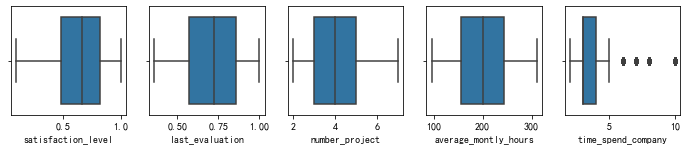

In [19]:
fig, ax = plt.subplots(1,5, figsize=(12, 2))
sns.boxplot(x=hr.columns[0], data=hr, ax=ax[0])
sns.boxplot(x=hr.columns[1], data=hr, ax=ax[1])
sns.boxplot(x=hr.columns[2], data=hr, ax=ax[2])
sns.boxplot(x=hr.columns[3], data=hr, ax=ax[3])
sns.boxplot(x=hr.columns[4], data=hr, ax=ax[4])

In [20]:
hr.describe()
hr['left'].value_counts()/hr['left'].count()

0    0.833959
1    0.166041
Name: left, dtype: float64

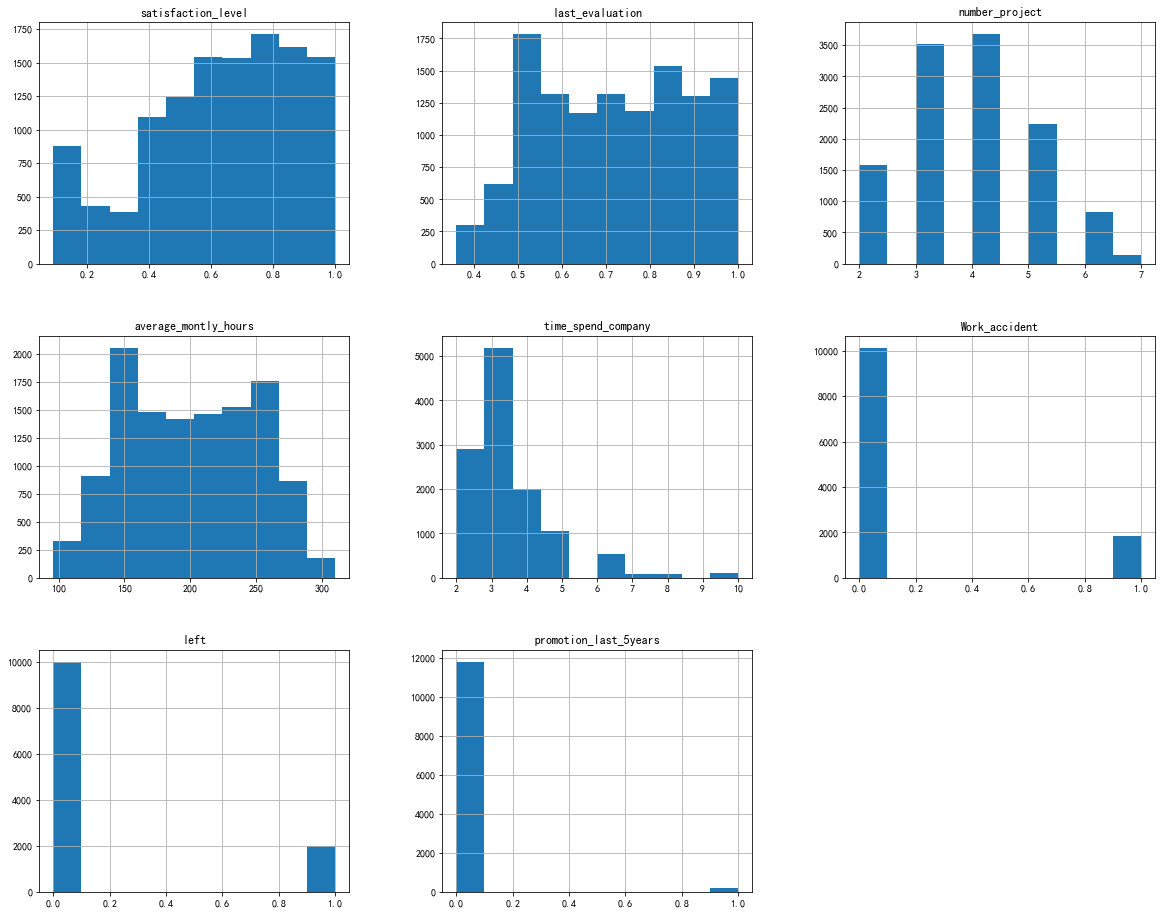

In [21]:
hr.hist(figsize=(20,16)) 
plt.show()

总人数: 11991


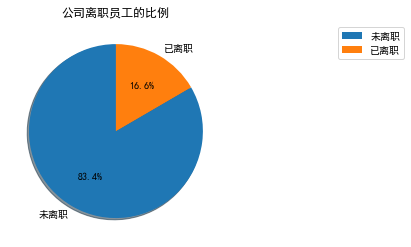

In [22]:
data_1eft=hr.left.value_counts()
plt.pie([data_1eft[0]/hr.left.count(),data_1eft[1]/hr.left.count()],labels=['未离职','已离职'], autopct='%.1f%%',
       shadow=True, startangle=90)
plt.title("公司离职员工的比例")
plt.legend(loc='upper left', bbox_to_anchor=(1.5, 1))
print('总人数:',hr.left.count())

C:\Users\huawei\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\huawei\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


(8.5, -0.5)

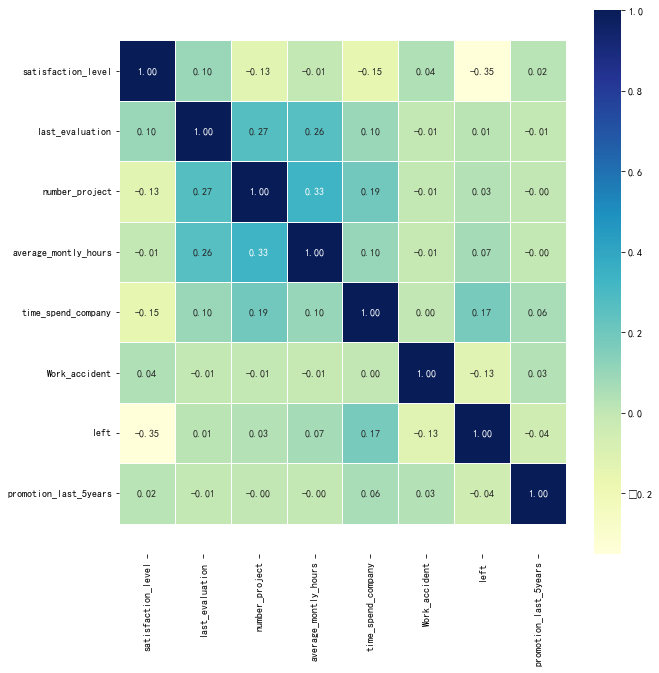

In [23]:
corr_matrix = hr.corr()
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5) 

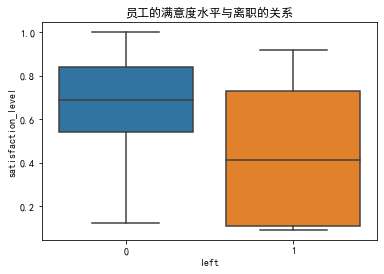

In [24]:
sns.boxplot(x=hr['left'],y=hr['satisfaction_level']).set_title('员工的满意度水平与离职的关系')
plt.show()

Text(0.5, 1.0, '员工的最后一次绩效评估成绩与离职的关系')

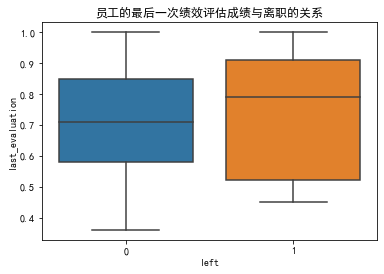

In [25]:
sns.boxplot(x=hr['left'],y=hr['last_evaluation']).set_title('员工的最后一次绩效评估成绩与离职的关系')

Text(0.5, 1.0, '员工的月平均工作时长与离职的关系')

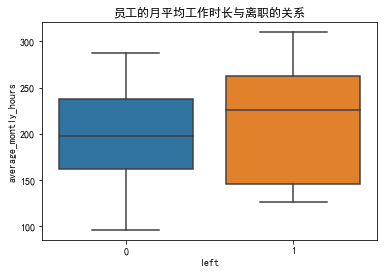

In [26]:
sns.boxplot(x=hr['left'],y=hr['average_montly_hours']).set_title('员工的月平均工作时长与离职的关系')

Text(0.5, 1.0, '不同薪资的员工比例')

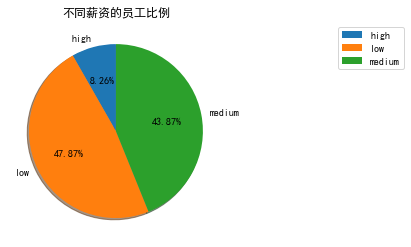

In [27]:
data_left =hr.groupby('salary').left.count()
plt.pie(data_left, labels=data_left.index, autopct="%1.2f%%", shadow=True,
             startangle=90)
plt.legend(loc='upper left', bbox_to_anchor=(1.5, 1))
plt.title('不同薪资的员工比例')

Text(0.5, 1.0, '不同薪资水平中的离职人数占比')

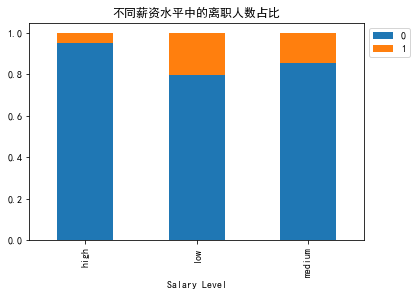

In [28]:
table=pd.crosstab(hr.salary,hr.left)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Salary Level')
plt.title('不同薪资水平中的离职人数占比')

Text(0.5, 1.0, '公司各部门人数占比')

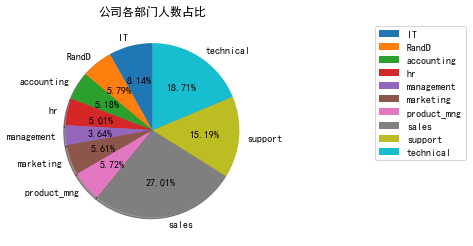

In [29]:
plt.rcParams['font.family'] = 'SimHei'
data_sales =hr.groupby('sales').left.count()

plt.pie(data_sales, labels=data_sales.index, autopct="%1.2f%%", shadow=True,
             startangle=90)
plt.legend(loc='upper left', bbox_to_anchor=(1.5, 1))
plt.title("公司各部门人数占比")


Text(0.5, 1.0, '公司各个职位中离职人数占比')

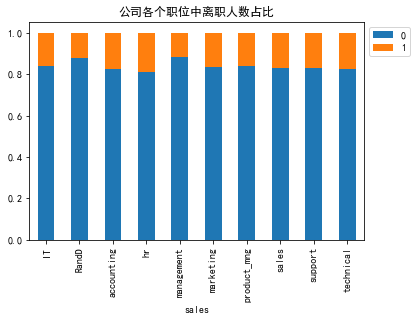

In [31]:
#各个职位中离职和未离职人数占比——柱状图
data_sales=pd.crosstab(hr.sales,hr.left)
data_sales.div(data_sales.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('公司各个职位中离职人数占比')

Text(0.5, 1.0, '各员工参加的项目个数与离职的关系')

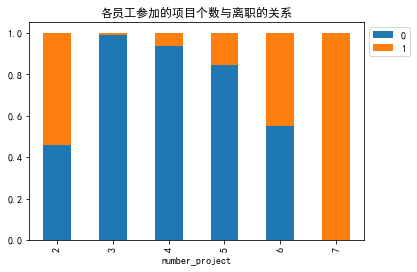

In [32]:
data_number_project=pd.crosstab(hr.number_project,hr.left)
data_number_project.div(data_number_project.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('各员工参加的项目个数与离职的关系')

Text(0.5, 1.0, '参与不同项目数的员工比例')

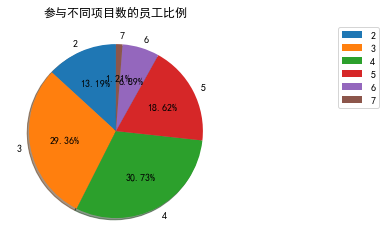

In [33]:
data_number_project =hr.groupby('number_project').left.count()
plt.pie(data_number_project, labels=data_number_project.index, autopct="%1.2f%%", shadow=True,
        startangle=90, radius=1)
plt.legend(loc='upper left', bbox_to_anchor=(1.5, 1))
plt.title('参与不同项目数的员工比例')

Text(0.5, 1.0, '员工工作年限与离职的关系')

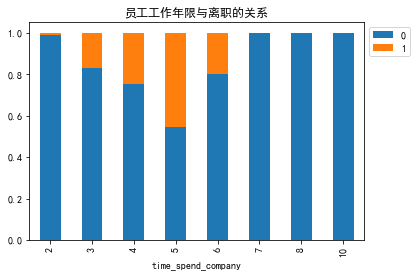

In [34]:
data_bar = pd.crosstab(hr.time_spend_company,hr.left)
data_bar.div(data_bar.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('员工工作年限与离职的关系')

Text(0.5, 1.0, '不同工作年限的员工比例')

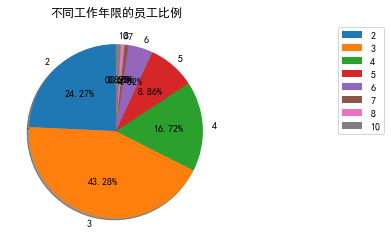

In [35]:
data_left =hr.groupby('time_spend_company').left.count()
plt.pie(data_left, labels=data_left.index, autopct="%.2f%%", shadow=True,
             startangle=90)
plt.legend(loc='upper left', bbox_to_anchor=(1.5, 1))
plt.title('不同工作年限的员工比例')

Text(0.5, 1.0, '是否出现工作差错与离职的关系')

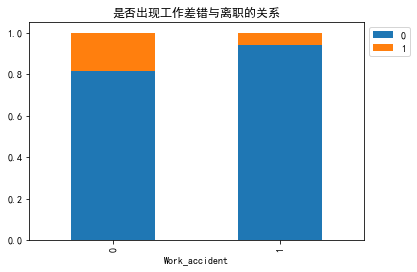

In [36]:
data_bar = pd.crosstab(hr.Work_accident,hr.left)
data_bar.div(data_bar.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('是否出现工作差错与离职的关系')

Text(0.5, 1.0, '是否出现工作差错的员工比例')

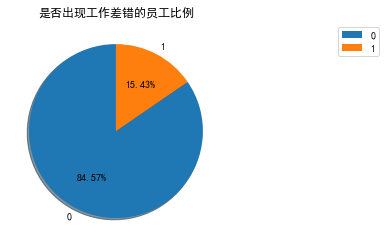

In [37]:
data_left =hr.groupby('Work_accident').left.count()
plt.pie(data_left, labels=data_left.index, autopct="%1.2f%%", shadow=True,
             startangle=90)
plt.legend(loc='upper left', bbox_to_anchor=(1.5, 1))
plt.title('是否出现工作差错的员工比例')

Text(0.5, 1.0, '五年内是否升职的员工比例')

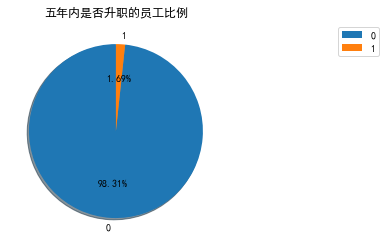

In [38]:
data_left =hr.groupby('promotion_last_5years').left.count()
plt.pie(data_left, labels=data_left.index, autopct="%1.2f%%", shadow=True,
             startangle=90)
plt.legend(loc='upper left', bbox_to_anchor=(1.5, 1))
plt.title('五年内是否升职的员工比例')

Text(0.5, 1.0, '五年内是否升职与离职的关系')

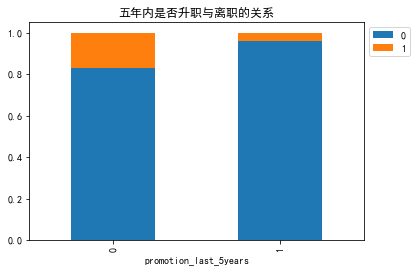

In [39]:
data_pro=pd.crosstab(hr.promotion_last_5years,hr.left)
data_pro.div(data_pro.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('五年内是否升职与离职的关系')

把职位考虑在内
hr.loc[hr["salary"] =='low', 'salary']=0
hr.loc[hr["salary"] =='medium', 'salary']=1
hr.loc[hr["salary"] =='high', 'salary']=2
#newdata = data[['number_project','left']].join(dummies)
one_hot=pd.get_dummies(hr['sales'],prefix='dpm')
hr_2=hr[:].join(one_hot)
del hr_2['sales']
hr_2

In [40]:
hr.loc[hr["salary"] =='low', 'salary']=0
hr.loc[hr["salary"] =='medium', 'salary']=1
hr.loc[hr["salary"] =='high', 'salary']=2
hr_2=hr.iloc[:,[0,1,3,4,6]]
hr_2

,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,left
0,0.38,0.53,157,3,1
1,0.80,0.86,262,6,1
2,0.11,0.88,272,4,1
3,0.72,0.87,223,5,1
4,0.37,0.52,159,3,1
...,...,...,...,...,...
11995,0.90,0.55,259,10,0
11996,0.74,0.95,266,10,0
11997,0.85,0.54,185,10,0
11998,0.33,0.65,172,10,0


In [58]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report
x=hr_2.drop(['left'],axis=1)
y=hr_2['left']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.8)

In [59]:
treedtc =tree.DecisionTreeClassifier() 
treedtc.fit(x_train,y_train)
predict_dtc=treedtc.predict(x_test)

from sklearn.metrics import precision_score
result_precision = precision_score(y_test,predict_dtc)
print("精准率: "+str(result_precision))
from sklearn.metrics import recall_score
result_recall = recall_score(y_test,predict_dtc)
print("召回率: "+str(result_recall))

精准率: 0.8834164588528678
召回率: 0.8812189054726368


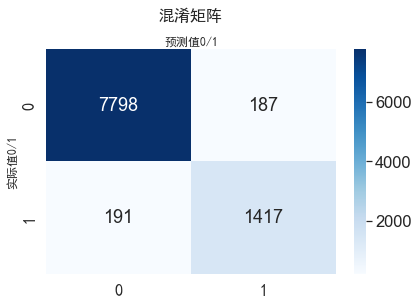

In [60]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test,predict_dtc)
#混淆矩阵美化
plt.rcParams['font.family'] = 'SimHei' #使plt图表可以显示中文
def plot_cnf_matirx(cnf_matrix,description):
    class_names = [0,1]
    fig,ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks,class_names)
    plt.yticks(tick_marks,class_names)


    sns.set(font_scale=1.5)
    sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues',
               fmt = 'g')
    ax.xaxis.set_label_position('top')
    plt.tight_layout()
    plt.title(description, y = 1.1,fontsize=16)
    plt.ylabel('实际值0/1',fontsize=12)
    plt.xlabel('预测值0/1',fontsize=12)
    plt.show()
    
plot_cnf_matirx(cnf_matrix,'混淆矩阵')

from sklearn.externals import joblib
clf = svm.SVC(kernel='linear')
rf=clf.fit(array(trainMat), array(listClasses))
joblib.dump(rf,'rf.model')
RF=joblib.load('rf.model')result=RF.predict(thsDoc)

[Text(444.13461538461536, 836.3076923076923, 'X[0] <= 0.465\ngini = 0.276\nsamples = 1199\nvalue = [1001, 198]'),
 Text(147.84615384615384, 769.4030769230769, 'X[0] <= 0.115\ngini = 0.5\nsamples = 273\nvalue = [138, 135]'),
 Text(128.76923076923077, 702.4984615384615, 'gini = 0.0\nsamples = 47\nvalue = [0, 47]'),
 Text(166.92307692307693, 702.4984615384615, 'X[0] <= 0.355\ngini = 0.476\nsamples = 226\nvalue = [138, 88]'),
 Text(76.3076923076923, 635.5938461538461, 'X[2] <= 136.0\ngini = 0.071\nsamples = 108\nvalue = [104, 4]'),
 Text(38.15384615384615, 568.6892307692308, 'X[2] <= 132.0\ngini = 0.219\nsamples = 16\nvalue = [14, 2]'),
 Text(19.076923076923077, 501.7846153846154, 'gini = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(57.230769230769226, 501.7846153846154, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(114.46153846153845, 568.6892307692308, 'X[3] <= 3.5\ngini = 0.043\nsamples = 92\nvalue = [90, 2]'),
 Text(95.38461538461539, 501.7846153846154, 'X[0] <= 0.145\ngini = 0.142\

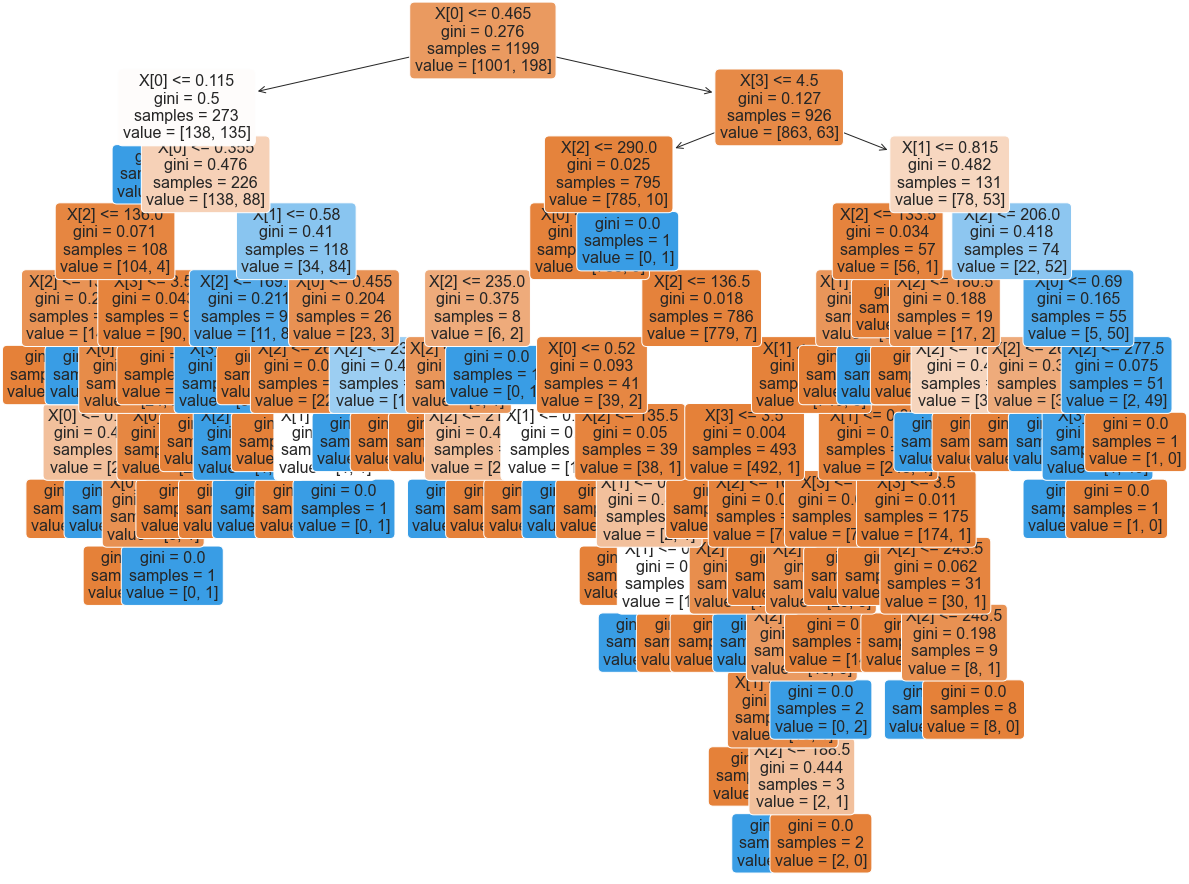

In [46]:
plt.figure(figsize = (20,16))
tree.plot_tree(treedtc, fontsize = 16,rounded = True , filled = True)

In [47]:
import joblib
import numpy as np
joblib.dump(treedtc,'E:\\trmdl.pkl')

['E:\\trmdl.pkl']